In [1]:
import pandas as pd 
import numpy as np 

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
datafe = pd.read_csv('BlackFriday.csv')
datafe1= datafe.iloc[0:1000, 0:12]
datafe1
datafe1.shape

(1000, 12)

In [3]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Product_ID                  1000 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Age                         1000 non-null   object 
 4   Occupation                  1000 non-null   int64  
 5   City_Category               1000 non-null   object 
 6   Stay_In_Current_City_Years  1000 non-null   object 
 7   Marital_Status              1000 non-null   int64  
 8   Product_Category_1          1000 non-null   int64  
 9   Product_Category_2          704 non-null    float64
 10  Product_Category_3          324 non-null    float64
 11  Purchase                    1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


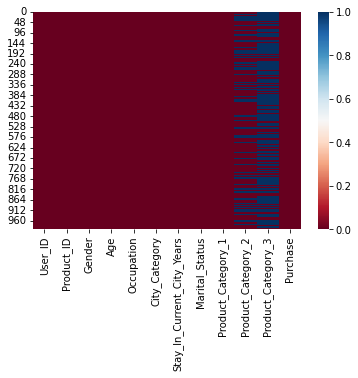

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(datafe1.isnull(),cmap='RdBu');

C:\Users\tharaniv\AppData\Local\Temp\ipykernel_1856\2080465528.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(datafe1.drop('User_ID',1).corr(method='spearman'), annot=True,cmap='coolwarm');


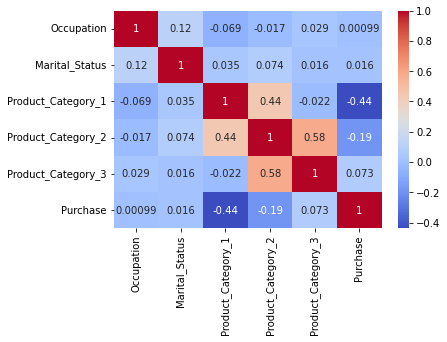

In [6]:
sns.heatmap(datafe1.drop('User_ID',1).corr(method='spearman'), annot=True,cmap='coolwarm');

C:\Users\tharaniv\AppData\Local\Temp\ipykernel_1856\636817059.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(datafe1.drop('User_ID',1).corr(method='pearson'), annot=True,cmap='coolwarm');


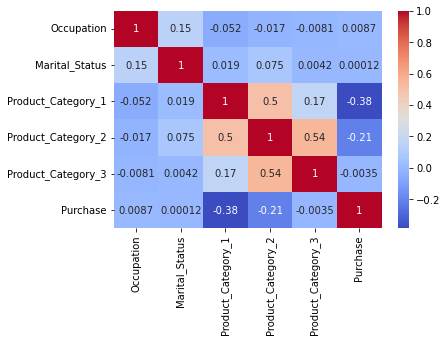

In [7]:
sns.heatmap(datafe1.drop('User_ID',1).corr(method='pearson'), annot=True,cmap='coolwarm');

In [8]:
datafe1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.000000e+03,1000.000000,1000.000000,1000.000000,704.000000,324.000000,1000.000000
mean,1.000091e+06,8.366000,0.509000,4.896000,9.627841,12.750000,9582.467000
std,5.203707e+01,6.594659,0.500169,3.563409,5.033104,4.037268,5120.496575
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,584.000000
25%,1.000045e+06,3.000000,0.000000,1.000000,5.000000,9.000000,5909.000000
50%,1.000092e+06,7.000000,1.000000,5.000000,8.000000,14.000000,8125.000000
75%,1.000142e+06,15.000000,1.000000,8.000000,14.000000,16.000000,13552.500000
max,1.000173e+06,20.000000,1.000000,18.000000,17.000000,18.000000,23792.000000


In [9]:
datafe1.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            296
Product_Category_3            676
Purchase                        0
dtype: int64

In [10]:
numeric_features = [feature for feature in datafe1.columns if datafe1[feature].dtype!='O']
categorical_features = [feature for feature in datafe1.columns if datafe1[feature].dtype =='O']

In [11]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

We have 5 categorical features : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


# UNIVARIATE ANALYSIS

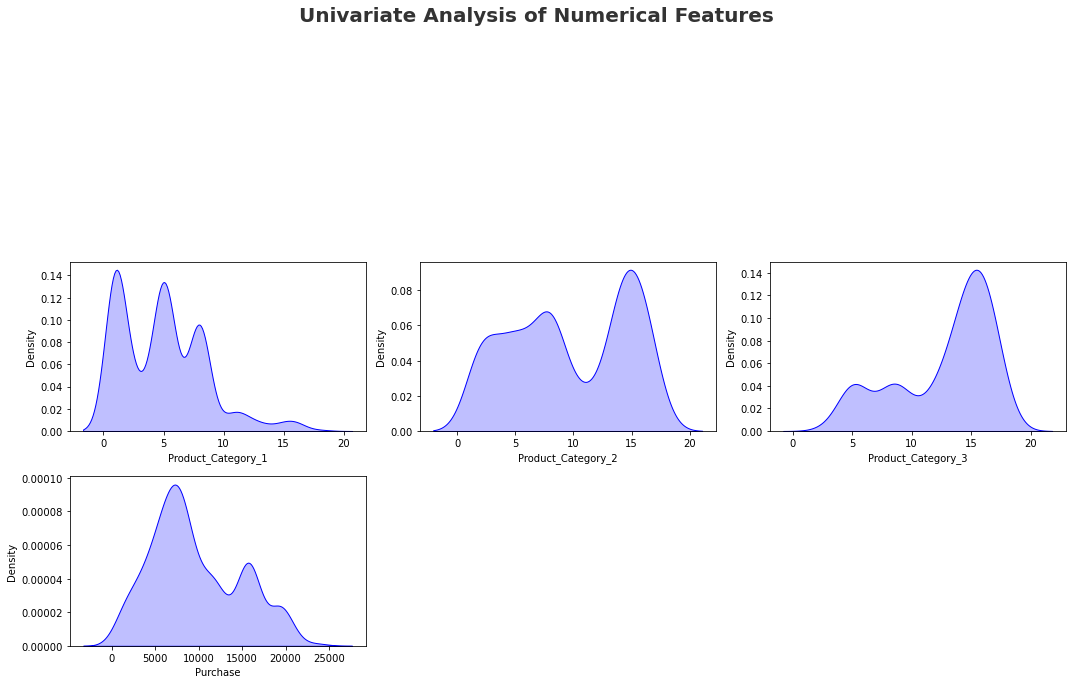

In [12]:
#Numeric Features:

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(3, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=datafe1[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [13]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
datafe1['Product_Category_1'] = datafe1['Product_Category_1'].replace(0,datafe1['Product_Category_1'].mean())
datafe1['Product_Category_2'] = datafe1['Product_Category_2'].replace(0,datafe1['Product_Category_2'].mean())
datafe1['Product_Category_3'] = datafe1['Product_Category_3'].replace(0,datafe1['Product_Category_3'].mean())


# checking for outliers


User_ID                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Occupation            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Marital_Status        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Product_Category_1       AxesSubplot(0.125,0.391471;0.227941x0.222059)
Product_Category_2    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Product_Category_3    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Purchase                    AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

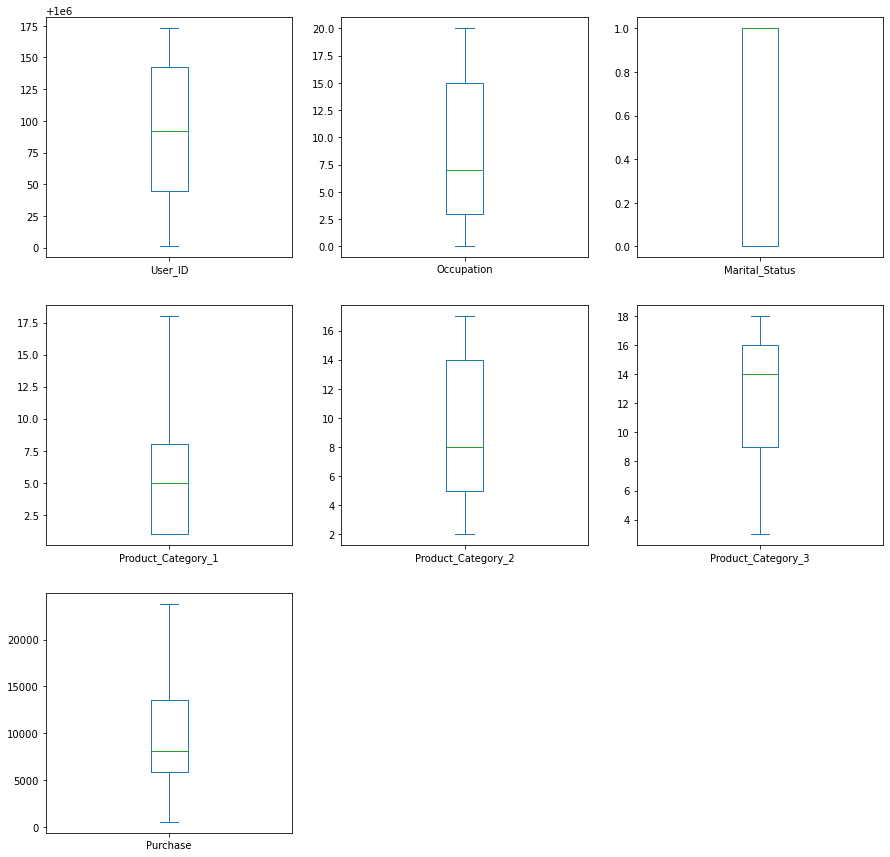

In [15]:
datafe1.iloc[:,0:12].plot(kind='box', subplots=True, layout=(3,3),figsize=(15,15))


In [16]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
pd.get_dummies(datafe1['Gender'])
               

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
995,0,1
996,0,1
997,1,0
998,0,1


In [18]:
## Handling categorical feature Gender

datafe1['Gender']=datafe1['Gender'].map({'F':0,'M':1})
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
## Handle categorical feature Age

datafe1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
# pd.get_dummies(df['Age'],drop_first=True)

datafe1['Age']=datafe1['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [21]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
datafe1['Age']= label_encoder.fit_transform(datafe1['Age'])
 
datafe1['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [22]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [23]:
##fixing categorical City_category

data_city=pd.get_dummies(datafe1['City_Category'],drop_first=True)

In [24]:
data_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [25]:
datafe1 = pd.concat([datafe1,data_city],axis=1)

In [26]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,0,0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,0,0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,0,1


In [27]:
#drop City_category

datafe1.drop('City_Category',axis=1,inplace=True)

In [28]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,NaN,NaN,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057,0,0
4,1000002,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,0,1


In [29]:
#Missing values

datafe1.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            296
Product_Category_3            676
Purchase                        0
B                               0
C                               0
dtype: int64

In [30]:
## Focus on replacing missing values

datafe1['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7.])

In [31]:
datafe1['Product_Category_2'].value_counts()

8.0     126
14.0    107
2.0      94
16.0     89
15.0     57
4.0      49
6.0      48
5.0      42
11.0     25
17.0     22
13.0     13
9.0      10
10.0     10
12.0      7
3.0       4
7.0       1
Name: Product_Category_2, dtype: int64

In [32]:
datafe1['Product_Category_2'].mode()[0]

8.0

In [33]:
## Replace the missing values with mode
datafe1['Product_Category_2']=datafe1['Product_Category_2'].fillna(datafe1['Product_Category_2'].mode()[0])

In [34]:
datafe1['Product_Category_2'].isnull().sum()

0

In [35]:
## Product_category 3 replace missing values
datafe1['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [36]:
datafe1['Product_Category_3'].value_counts()

16.0    61
15.0    52
14.0    41
17.0    38
5.0     33
9.0     22
8.0     20
12.0    18
13.0    16
6.0      8
18.0     4
11.0     4
10.0     3
4.0      2
3.0      2
Name: Product_Category_3, dtype: int64

In [37]:
## Replace the missing values with mode

datafe1['Product_Category_3']=datafe1['Product_Category_3'].fillna(datafe1['Product_Category_3'].mode()[0])

In [38]:
datafe.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
datafe1.shape

(1000, 13)

In [40]:
datafe1['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
datafe1['Stay_In_Current_City_Years']=datafe1['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\tharaniv\AppData\Local\Temp\ipykernel_1856\632683659.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datafe1['Stay_In_Current_City_Years']=datafe1['Stay_In_Current_City_Years'].str.replace('+','')


In [42]:
datafe1.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,1


In [43]:
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Product_ID                  1000 non-null   object 
 2   Gender                      1000 non-null   int64  
 3   Age                         1000 non-null   int64  
 4   Occupation                  1000 non-null   int64  
 5   Stay_In_Current_City_Years  1000 non-null   object 
 6   Marital_Status              1000 non-null   int64  
 7   Product_Category_1          1000 non-null   int64  
 8   Product_Category_2          1000 non-null   float64
 9   Product_Category_3          1000 non-null   float64
 10  Purchase                    1000 non-null   int64  
 11  B                           1000 non-null   uint8  
 12  C                           1000 non-null   uint8  
dtypes: float64(2), int64(7), object(2)

In [44]:
##convert object into integers

datafe1['Stay_In_Current_City_Years']=datafe1['Stay_In_Current_City_Years'].astype(int)
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Product_ID                  1000 non-null   object 
 2   Gender                      1000 non-null   int64  
 3   Age                         1000 non-null   int64  
 4   Occupation                  1000 non-null   int64  
 5   Stay_In_Current_City_Years  1000 non-null   int32  
 6   Marital_Status              1000 non-null   int64  
 7   Product_Category_1          1000 non-null   int64  
 8   Product_Category_2          1000 non-null   float64
 9   Product_Category_3          1000 non-null   float64
 10  Purchase                    1000 non-null   int64  
 11  B                           1000 non-null   uint8  
 12  C                           1000 non-null   uint8  
dtypes: float64(2), int32(1), int64(7),

In [45]:
datafe1['B']=datafe1['B'].astype(int)
datafe1['C']=datafe1['C'].astype(int)

In [46]:
datafe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Product_ID                  1000 non-null   object 
 2   Gender                      1000 non-null   int64  
 3   Age                         1000 non-null   int64  
 4   Occupation                  1000 non-null   int64  
 5   Stay_In_Current_City_Years  1000 non-null   int32  
 6   Marital_Status              1000 non-null   int64  
 7   Product_Category_1          1000 non-null   int64  
 8   Product_Category_2          1000 non-null   float64
 9   Product_Category_3          1000 non-null   float64
 10  Purchase                    1000 non-null   int64  
 11  B                           1000 non-null   int32  
 12  C                           1000 non-null   int32  
dtypes: float64(2), int32(3), int64(7),

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

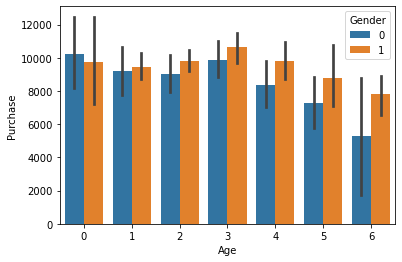

In [47]:
##Visualisation Age vs Purchased

sns.barplot('Age','Purchase',hue='Gender',data=datafe1)

# Purchasing of men is high then women

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

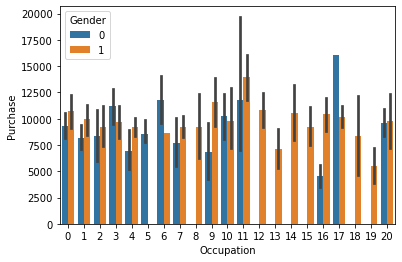

In [48]:
## Visualization of Purchase with occupation

sns.barplot('Occupation','Purchase',hue='Gender',data=datafe1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

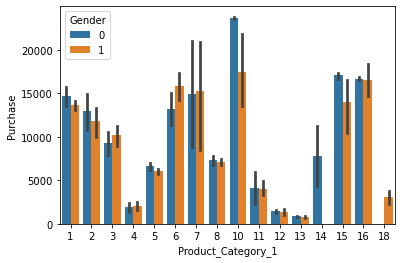

In [49]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=datafe1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

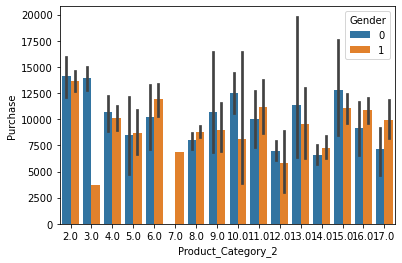

In [50]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=datafe1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

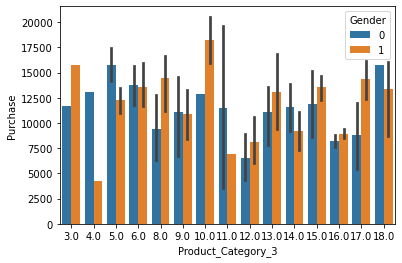

In [51]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=datafe1)

In [52]:
data = datafe1.drop('Product_ID', axis=1)

In [53]:
data.head()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,1000001,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,1000001,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1000002,1,6,16,4,0,8,8.0,16.0,7969,0,1


In [54]:
##Feature Scaling 

data1=data[data['Purchase'].isnull()]

In [55]:
x=data.drop('Purchase',axis=1)
y=data['Purchase']

In [56]:
x.head()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000001,0,0,10,2,0,3,8.0,16.0,0,0
1,1000001,0,0,10,2,0,1,6.0,14.0,0,0
2,1000001,0,0,10,2,0,12,8.0,16.0,0,0
3,1000001,0,0,10,2,0,12,14.0,16.0,0,0
4,1000002,1,6,16,4,0,8,8.0,16.0,0,1


In [57]:
x.shape

(1000, 11)

In [58]:
y.shape

(1000,)

In [59]:
y

0       8370
1      15200
2       1422
3       1057
4       7969
       ...  
995    19696
996    15745
997    16018
998    14070
999      759
Name: Purchase, Length: 1000, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [61]:
X_train.shape

(700, 11)

In [64]:

from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(x, y) 

model = RandomForestRegressor()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.6342836605629398


In [65]:
y_pred = regressor.predict(X_test)

In [66]:
#import matrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1096.7792779106405
MSE: 2143506.0049301274
RMSE: 1464.0717212384534


In [67]:
x = data.iloc[: ,0:12]
y = data['Purchase']

In [68]:
data

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,1000001,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,1000001,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1000002,1,6,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1000170,1,2,11,1,1,1,15.0,16.0,19696,0,1
996,1000170,1,2,11,1,1,1,8.0,17.0,15745,0,1
997,1000171,0,5,17,1,1,2,4.0,5.0,16018,1,0
998,1000172,1,2,3,2,0,10,13.0,16.0,14070,0,1


# K Fold Cross Validation


In [69]:
from sklearn.model_selection import KFold
model=RandomForestRegressor()
kfold_validation=KFold(10)

In [70]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.99997054 0.99989383 0.9999407  0.99971463 0.99997936 0.99995617
 0.99990176 0.99994348 0.9999845  0.99987599]
0.9999160954451707


# Stratified K-fold Cross Validation

In [71]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=3)
model=RandomForestRegressor()
scores=cross_val_score(model,x,y,cv=skfold)
print(np.mean(scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


0.9998457360877465


# xgboost

In [72]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xg_reg.fit(X_train, y_train)

[11:25:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [73]:
y_pred = xg_reg.predict(X_test)

In [74]:
y_pred

array([11520.934 , 14013.452 , 11575.568 , 14790.325 ,  6335.85  ,
        6135.5605,  5609.0957, 11520.934 ,  6614.244 ,  6163.2266,
        7180.1963, 15154.904 , 14480.396 ,   675.7102,  4968.877 ,
       11656.833 , 13825.84  , 15469.216 , 12975.205 ,  5711.1333,
       15067.026 ,  6316.811 ,  1905.0309,  6815.8574,  6679.247 ,
       12790.9   ,  6154.377 ,  5944.805 ,  7743.14  , 11874.123 ,
       15636.196 ,  5426.7197, 12316.74  ,  5552.3115,  5728.3833,
       13862.034 ,  6236.424 , 15003.313 ,  6380.0664,  5478.2817,
        6679.2964,  5616.946 , 11918.988 ,  5944.805 , 15155.723 ,
        5653.047 , 10117.959 ,  4897.973 ,  6405.6265, 12904.215 ,
       14022.994 ,  7069.721 ,  5635.982 ,  5723.5933,  7412.3604,
        7654.285 ,  6649.917 ,  5310.022 , 15074.423 ,  7180.1963,
        8009.235 , 14352.084 ,  6855.8516,  7733.7026,  6123.9214,
        7245.5015,  6277.4497, 14849.104 ,  6308.5405,  6784.35  ,
        5613.9785,  6010.0166,  6685.7456, 10752.158 , 13331.1

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
mse = mean_squared_error(y_test, y_pred)

In [77]:
print("MSE: %0.2f" % (mse))

MSE: 11926713.49


In [78]:
rmse = np.sqrt(mse)
print("RSME: %0.2f" % (rmse))

RSME: 3453.51
